In [ ]:
#Name: Sahil Shaikh
#Roll No: 54
#Practical: DAV Lab
#Experiment No 3

In [ ]:
#Multiple Linear Regression

In [ ]:
data <- read.csv("Housing_Data.csv")
dim(data)

[1] 2919   13

In [ ]:
head(data)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0,856,208500
2,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0,1262,181500
3,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0,920,223500
4,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0,756,140000
5,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0,1145,250000
6,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0,796,143000


In [ ]:
getMissingValues <- function(data) {
  missing_values <- colSums(is.na(data))
  sorted_missing_values <- sort(missing_values, decreasing = TRUE)
  for(col_name in names(sorted_missing_values)){
    cat("Column:", col_name, "\tMissing Values:",sorted_missing_values[col_name],"\n")
  }
}
getMissingValues(data)

Column: SalePrice 	Missing Values: 1459 
Column: BsmtFinSF2 	Missing Values: 1 
Column: TotalBsmtSF 	Missing Values: 1 
Column: Id 	Missing Values: 0 
Column: MSSubClass 	Missing Values: 0 
Column: MSZoning 	Missing Values: 0 
Column: LotArea 	Missing Values: 0 
Column: LotConfig 	Missing Values: 0 
Column: BldgType 	Missing Values: 0 
Column: OverallCond 	Missing Values: 0 
Column: YearBuilt 	Missing Values: 0 
Column: YearRemodAdd 	Missing Values: 0 
Column: Exterior1st 	Missing Values: 0 


In [ ]:
data <- na.omit(data)
sum(is.na(data))

[1] 0

In [ ]:
data <-  subset(data,select = -Id)

In [ ]:
data$MSZoning <- as.numeric(factor(data$MSZoning))
data$LotConfig <- as.numeric(factor(data$LotConfig))
data$BldgType <- as.numeric(factor(data$BldgType))
data$Exterior1st <- as.numeric(factor(data$Exterior1st))

In [ ]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’




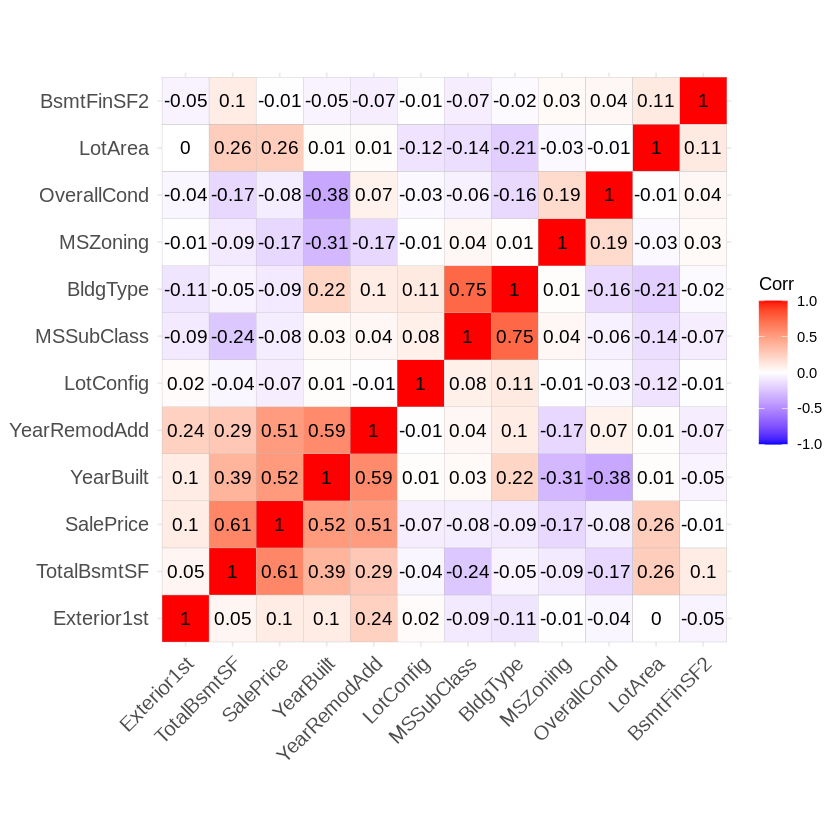

In [ ]:
library(ggplot2)
library(ggcorrplot)
ggcorrplot(cor(data),hc.order = TRUE, lab = TRUE)

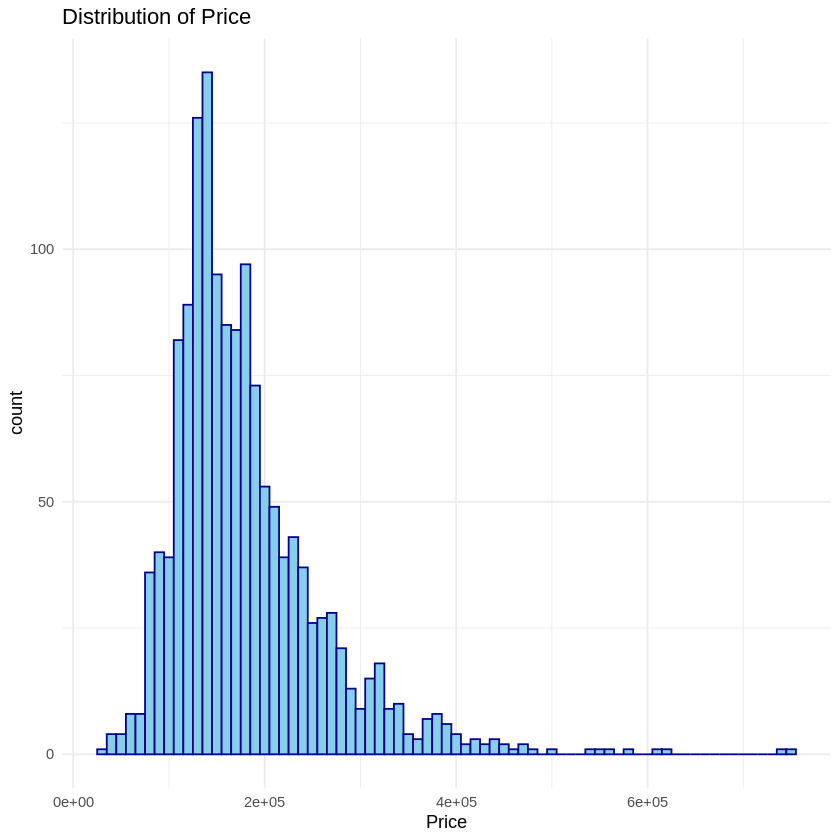

In [ ]:
library(ggplot2)
ggplot(data, aes(x = SalePrice)) +
geom_histogram(binwidth = 10000, fill = "skyblue", color = "darkblue") +
labs(title = "Distribution of Price", x = "Price") +
theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


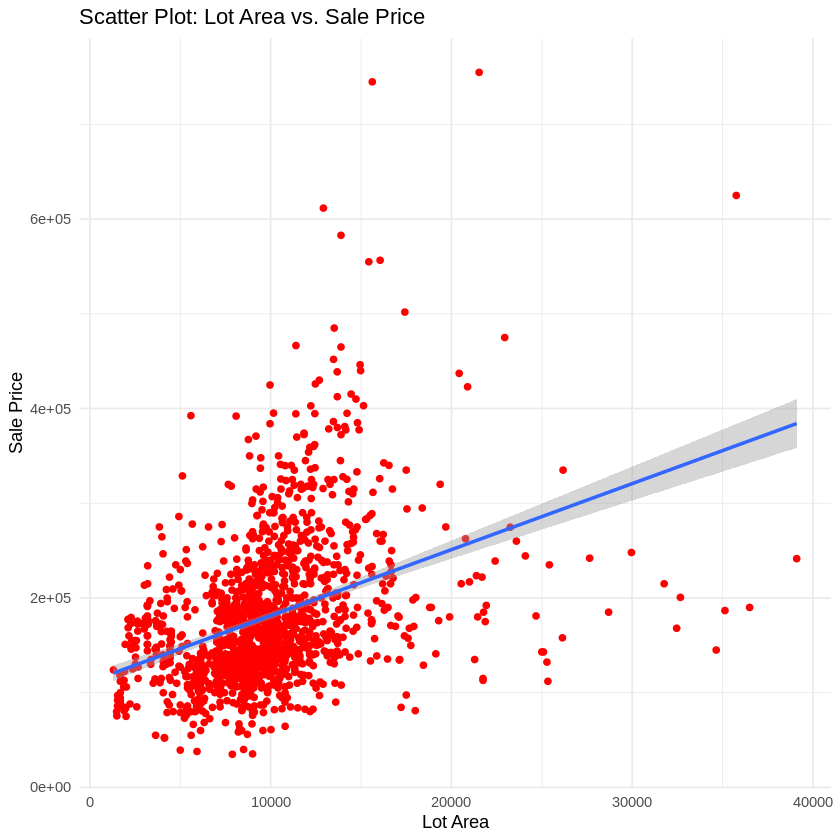

In [ ]:
ggplot(data, aes(x = LotArea, y = SalePrice)) +
geom_point(color = "red") +
labs(title = "Scatter Plot: Lot Area vs. Sale Price", x = "Lot Area", y = "Sale Price") +
theme_minimal()+
geom_smooth(method = lm)

`geom_smooth()` using formula = 'y ~ x'


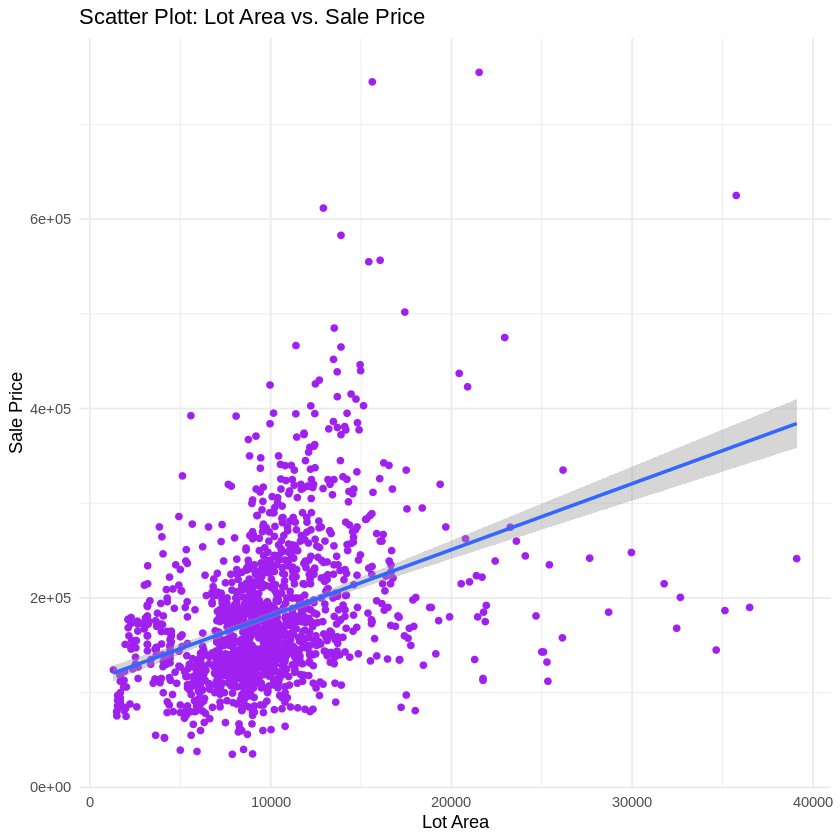

In [ ]:
data <- data[data$LotArea < 40000,]
ggplot(data, aes(x = LotArea, y = SalePrice)) +
geom_point(color = "purple") +
labs(title = "Scatter Plot: Lot Area vs. Sale Price", x = "Lot Area", y = "Sale Price") +
theme_minimal()+
geom_smooth(method = lm)


In [ ]:
set.seed(123)
train_proportion <- 0.7
train_indices <- sample(1:nrow(data),size = round(train_proportion * nrow(data)))
train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]
dim(train_data)
dim(test_data)

[1] 1012   12

[1] 434  12

In [ ]:
model <- lm(SalePrice ~ ., data = train_data)
summary(model)


Call:
lm(formula = SalePrice ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-162510  -25463   -5586   20765  271443 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.046e+06  1.560e+05 -19.530  < 2e-16 ***
MSSubClass    5.702e+02  5.598e+01  10.184  < 2e-16 ***
MSZoning     -1.397e+03  2.324e+03  -0.601  0.54784    
LotArea       4.069e+00  3.874e-01  10.503  < 2e-16 ***
LotConfig     4.816e+02  9.052e+02   0.532  0.59481    
BldgType     -1.804e+04  2.088e+03  -8.642  < 2e-16 ***
OverallCond   5.904e+03  1.499e+03   3.937 8.81e-05 ***
YearBuilt     7.671e+02  7.372e+01  10.405  < 2e-16 ***
YearRemodAdd  7.833e+02  9.854e+01   7.950 5.03e-15 ***
Exterior1st  -8.116e+02  4.667e+02  -1.739  0.08235 .  
BsmtFinSF2   -2.334e+01  8.662e+00  -2.695  0.00716 ** 
TotalBsmtSF   8.961e+01  4.254e+00  21.067  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45270 on 1000 de

In [ ]:
predictions <- predict(model, newdata = test_data)
head(predictions)

1        3        7       14       15       21 
202136.0 216946.7 262690.4 250896.8 159607.4 254614.1

In [ ]:
test_case <- data.frame(MSSubClass = 60,MSZoning = 4,LotArea = 8450,
LotConfig = 5, BldgType = 1, OverallCond = 5,
YearBuilt = 2003, YearRemodAdd = 2003,
Exterior1st = 13, BsmtFinSF2 = 0,
TotalBsmtSF = 856
)
predicted_price <- predict(model,newdata = test_case)
print(predicted_price)

     1 
202136 
